# 回归

- 包含线性回归、多项式回归，岭回归，lasso等，由sklearn来实现

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#线性回归" data-toc-modified-id="线性回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>线性回归</a></span><ul class="toc-item"><li><span><a href="#数据导入" data-toc-modified-id="数据导入-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据导入</a></span></li><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据集划分</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#测试数据并模型评估" data-toc-modified-id="测试数据并模型评估-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>测试数据并模型评估</a></span></li></ul></li><li><span><a href="#多项式回归" data-toc-modified-id="多项式回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>多项式回归</a></span><ul class="toc-item"><li><span><a href="#导入数据并预览" data-toc-modified-id="导入数据并预览-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>导入数据并预览</a></span></li><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数据集划分</a></span></li><li><span><a href="#数据划分函数使用心得" data-toc-modified-id="数据划分函数使用心得-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>数据划分函数使用心得</a></span></li><li><span><a href="#线性模型和多项式模型对比" data-toc-modified-id="线性模型和多项式模型对比-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>线性模型和多项式模型对比</a></span><ul class="toc-item"><li><span><a href="#线性模型" data-toc-modified-id="线性模型-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>线性模型</a></span></li><li><span><a href="#多项式模型" data-toc-modified-id="多项式模型-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>多项式模型</a></span></li><li><span><a href="#对比结果可视化" data-toc-modified-id="对比结果可视化-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>对比结果可视化</a></span></li><li><span><a href="#小结" data-toc-modified-id="小结-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>小结</a></span></li></ul></li></ul></li><li><span><a href="#岭回归和LASSO" data-toc-modified-id="岭回归和LASSO-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>岭回归和LASSO</a></span><ul class="toc-item"><li><span><a href="#以希尔伯特矩阵-OLS-线性拟合为例" data-toc-modified-id="以希尔伯特矩阵-OLS-线性拟合为例-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>以希尔伯特矩阵 OLS 线性拟合为例</a></span><ul class="toc-item"><li><span><a href="#用scipy.linalg创建hilbert矩阵" data-toc-modified-id="用scipy.linalg创建hilbert矩阵-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>用scipy.linalg创建hilbert矩阵</a></span></li><li><span><a href="#计算$\left-|-X^{T}X-\right-|$的结果" data-toc-modified-id="计算$\left-|-X^{T}X-\right-|$的结果-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>计算$\left | X^{T}X \right |$的结果</a></span></li><li><span><a href="#皮尔逊相关系数（Pearson-Correlation-Coefficient）" data-toc-modified-id="皮尔逊相关系数（Pearson-Correlation-Coefficient）-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>皮尔逊相关系数（Pearson Correlation Coefficient）</a></span></li><li><span><a href="#最小二乘线性拟合" data-toc-modified-id="最小二乘线性拟合-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>最小二乘线性拟合</a></span></li></ul></li><li><span><a href="#岭回归" data-toc-modified-id="岭回归-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>岭回归</a></span><ul class="toc-item"><li><span><a href="#岭回归拟合" data-toc-modified-id="岭回归拟合-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>岭回归拟合</a></span></li></ul></li><li><span><a href="#LASSO-回归" data-toc-modified-id="LASSO-回归-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LASSO 回归</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

---

## 线性回归

### 数据导入

- 数据集介绍及划分<br>波士顿房价数据集是机器学习中非常知名的数据集，它被用于多篇回归算法研究的学术论文中。该数据集共计 `506` 条，其中包含有 `13` 个与房价相关的特征以及 `1` 个目标值（房价）。

首先，我们使用 Pandas 加载并预览数据集。数据集名称为 `course-5-boston.csv`。

In [3]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/course-5-boston.csv

--2018-10-21 06:40:10--  http://labfile.oss.aliyuncs.com/courses/1081/course-5-boston.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35203 (34K) [text/csv]
Saving to: ‘course-5-boston.csv’

course-5-boston.csv 100%[===================>]  34.38K  --.-KB/s    in 0.06s   

2018-10-21 06:40:10 (571 KB/s) - ‘course-5-boston.csv’ saved [35203/35203]



In [5]:
import pandas as pd

df = pd.read_csv('course-5-boston.csv')
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


该数据集统计了波士顿地区各城镇的住房价格中位数，以及与之相关的特征。每列数据的列名解释如下：

- `CRIM`: 城镇犯罪率。
- `ZN`: 占地面积超过 2.5 万平方英尺的住宅用地比例。
- `INDUS`: 城镇非零售业务地区的比例。
- `CHAS`: 查尔斯河是否经过 (`=1` 经过，`=0` 不经过)。
- `NOX`: 一氧化氮浓度（每 `1000` 万份）。
- `RM`: 住宅平均房间数。
- `AGE`: 所有者年龄。
- `DIS`: 与就业中心的距离。
- `RAD`: 公路可达性指数。
- `TAX`: 物业税率。
- `PTRATIO`: 城镇师生比例。
- `BLACK`: 城镇的黑人指数。
- `LSTAT`: 人口中地位较低人群的百分数。
- `MEDV`: 城镇住房价格中位数。

本次实验中，我们不会使用到全部的数据特征。这里，仅选取 `CRIM`, `RM`, `LSTAT` 三个特征用于线性回归模型训练。我们将这三个特征的数据单独拿出来，并且使用 `describe()` 方法查看其描述信息。 `describe()` 统计了每列数据的个数、最大值、最小值、平均数等信息。

In [11]:
data = df[['crim','rm','lstat']]
target = df['medv']

### 数据集划分

In [35]:
# 划分数据集，分为train,test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.3, random_state=1)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(354, 3) (152, 3) (354,) (152,)


### 训练模型

```python
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```

- `fit_intercept`: 默认为 True，计算截距项。
- `normalize`: 默认为 False，不针对数据进行标准化处理。
- `copy_X`: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- `n_jobs`: 计算时的作业数量。默认为 1，若为 -1 则使用全部 CPU 参与运算。

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# 得到模型拟合参数
model.intercept_,model.coef_

(4.711271536469873, array([-0.07482133,  4.17449329, -0.6325041 ]))

###  测试数据并模型评估

In [38]:
preds = model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_pred=preds,y_true=y_test)
mse = mean_squared_error(y_pred=preds,y_true=y_test)
print(mae,mse)

4.13360936127 27.88953417


---

## 多项式回归

思路：是将数据转化为产生多项式特征矩阵，再用LR去做回归

### 导入数据并预览

我们使用到由世界卫生组织和联合国儿童基金会提供的「世界麻疹疫苗接种率」数据集。而目标则是预测相应年份的麻疹疫苗接种率。

In [1]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/course-6-vaccine.csv

--2018-10-22 03:58:42--  http://labfile.oss.aliyuncs.com/courses/1081/course-6-vaccine.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 621 [text/csv]
Saving to: ‘course-6-vaccine.csv’

course-6-vaccine.cs 100%[===================>]     621  --.-KB/s    in 0s      

2018-10-22 03:58:42 (78.3 MB/s) - ‘course-6-vaccine.csv’ saved [621/621]



In [215]:
import pandas as pd

df = pd.read_csv('course-6-vaccine.csv')
df.head(5)

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892


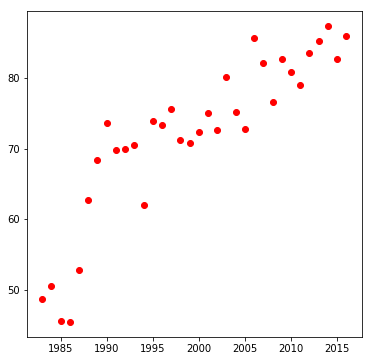

In [109]:
from matplotlib import pyplot as plt
%matplotlib inline

x = df['Year'].values
y = df['Values'].values

plt.figure(figsize=(6,6))
plt.scatter(x,y,c='r')

### 数据集划分

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,shuffle=False) #shuffle决定了是否random

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#这个函数转出的都是列向量

(23,) (11,) (23,) (11,)


### 数据划分函数使用心得

- 数据划分函数一般是由df取values值后带入进行处理，即输出值为np.narray

- 遇到生成的一维向量，大多情况是label，要注意要转为matrix,有两种思路（1.reshape; 2. np.array(ndim=2)）

In [115]:
# 定义一个将一维向量转为矩阵的函数

def vector_to_matrix(dta):
    dta = np.array(dta,ndmin=2).T #这里一定要转置,因为np.array默认生成的是行向量
    return dta

In [116]:
x_train = vector_to_matrix(x_train)
x_test = vector_to_matrix(x_test)
y_train = vector_to_matrix(y_train)
y_test = vector_to_matrix(y_test)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23, 1) (11, 1) (23, 1) (11, 1)


###  线性模型和多项式模型对比

####  线性模型

In [187]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
lr_pred = lr_model.predict(x_test)

In [189]:
# 预测评估
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_pred=lr_pred,y_true=y_test),mean_squared_error(y_pred=lr_pred,y_true=y_test)

(6.0119795156298528, 43.531858295153931)

####   多项式模型

In [209]:
from sklearn.preprocessing import PolynomialFeatures

# 生成多项式矩阵
poly_matrix_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_train_x_3 = poly_matrix_3.fit_transform(x_train)
poly_test_x_3 = poly_matrix_3.fit_transform(x_test)

# 代入LR模型
model = LinearRegression()
model.fit(poly_train_x_3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [210]:
poly_pred = model.predict(poly_test_x_3)

In [211]:
# 预测评估
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_pred=poly_pred,y_true=y_test),mean_squared_error(y_pred=poly_pred,y_true=y_test)

(4.5476914163434508, 29.933052221783786)

####   对比结果可视化

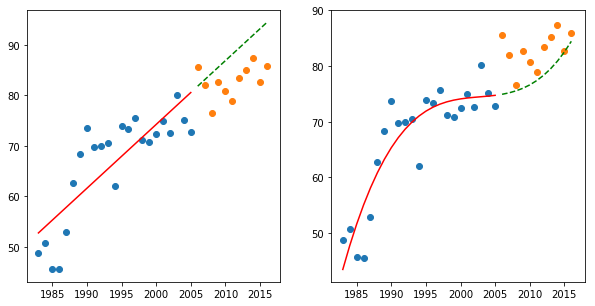

In [212]:
from matplotlib import pyplot as plt
%matplotlib inline

# 画两张图
fig,ax = plt.subplots(1,2,figsize=(10,5))

# # 生成x_tmp
# x_tmp = np.linspace(2006,2016,100)
# x_tmp = np.array(x_tmp,ndmin=2).T

# 拟合
ax[0].scatter(x_train,y_train)
ax[0].plot(x_train,lr_model.predict(x_train),c='r')

ax[1].scatter(x_train,y_train)
ax[1].plot(x_train,model.predict(poly_matrix_3.fit_transform(x_train)),c='r')

#预测结果
ax[0].scatter(x_test,y_test)
ax[0].plot(x_test,lr_model.predict(x_test),c='g',linestyle='--')

ax[1].scatter(x_test,y_test)
ax[1].plot(x_test,model.predict(poly_matrix_3.fit_transform(x_test)),c='g',linestyle='--')

#### 小结

- 在一张图上scatter画两次，系统会自动去赋予不同颜色

- 多项式是基于线性模型来实现的，由数据生成n阶多项式矩阵来代入线性模型

- 要注意多项式几阶的选择，防止过拟合，可通过画图 n阶的MSE等指标来判断

## 岭回归和LASSO

由于普通最小二乘法带来的局限性，导致许多时候都不能直接使用其进行线性回归拟合。特别是以下两种情况：

- 数据集的列（特征）数量 > 数据量（行数量），即  XX  不是列满秩。
- 数据集列（特征）数据之间存在较强的线性相关性，即模型容易出现过拟合。

### 以希尔伯特矩阵 OLS 线性拟合为例

线性代数中，希尔伯特矩阵是一种系数都是单位分数的方块矩阵。具体来说一个希尔伯特矩阵 $H$ 的第 $i$ 横行第 $j$ 纵列的系数是：

$$H_{{ij}}={\frac  {1}{i+j-1}} \tag1$$

一个 `5x5` 的希尔伯特矩阵如公式$(2)$所示：

$$
H_{5}={\begin{bmatrix}1&{\frac  {1}{2}}&{\frac  {1}{3}}&{\frac  {1}{4}}&{\frac  {1}{5}}\\[4pt]{\frac  {1}{2}}&{\frac  {1}{3}}&{\frac  {1}{4}}&{\frac  {1}{5}}&{\frac  {1}{6}}\\[4pt]{\frac  {1}{3}}&{\frac  {1}{4}}&{\frac  {1}{5}}&{\frac  {1}{6}}&{\frac  {1}{7}}\\[4pt]{\frac  {1}{4}}&{\frac  {1}{5}}&{\frac  {1}{6}}&{\frac  {1}{7}}&{\frac  {1}{8}}\\[4pt]{\frac  {1}{5}}&{\frac  {1}{6}}&{\frac  {1}{7}}&{\frac  {1}{8}}&{\frac  {1}{9}}\end{bmatrix}}\tag2
$$

因为希尔伯特矩阵每列数据之间存在较强的线性相关性，正好符合前面提到的 $\left | X^{T}X \right |$ 的结果趋近于 `0`，所以下面打算使用希尔伯特矩阵的数值完成一个最小二乘法的线性拟合实验，看是否会出现参数估计偏差。

#### 用scipy.linalg创建hilbert矩阵

我们使用 `Scipy` 提供的 `hilbert()` 方法，直接创建一个 `10x10` 的希尔伯特矩阵

In [219]:
from scipy.linalg import hilbert
x = hilbert(10)
x

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ,
         0.16666667,  0.14285714,  0.125     ,  0.11111111,  0.1       ],
       [ 0.5       ,  0.33333333,  0.25      ,  0.2       ,  0.16666667,
         0.14285714,  0.125     ,  0.11111111,  0.1       ,  0.09090909],
       [ 0.33333333,  0.25      ,  0.2       ,  0.16666667,  0.14285714,
         0.125     ,  0.11111111,  0.1       ,  0.09090909,  0.08333333],
       [ 0.25      ,  0.2       ,  0.16666667,  0.14285714,  0.125     ,
         0.11111111,  0.1       ,  0.09090909,  0.08333333,  0.07692308],
       [ 0.2       ,  0.16666667,  0.14285714,  0.125     ,  0.11111111,
         0.1       ,  0.09090909,  0.08333333,  0.07692308,  0.07142857],
       [ 0.16666667,  0.14285714,  0.125     ,  0.11111111,  0.1       ,
         0.09090909,  0.08333333,  0.07692308,  0.07142857,  0.06666667],
       [ 0.14285714,  0.125     ,  0.11111111,  0.1       ,  0.09090909,
         0.08333333,  0.07692308,  0.07142857

#### 计算$\left | X^{T}X \right |$的结果

In [220]:
np.linalg.det(np.dot(x,x.T))

-7.9339463948953352e-92

可以看到，这里的 $\left | X^{T}X \right |$ 的结果的确趋近于 `0`。

#### 皮尔逊相关系数（Pearson Correlation Coefficient）

In [222]:
"""计算希尔伯特矩阵每列数据的相关性系数
"""
pd.DataFrame(x,columns=['x%d' %i for i in range(1,11)]).corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,0.985344,0.965392,0.948277,0.934230,0.922665,0.913025,0.904883,0.897921,0.891902
x2,0.985344,1.000000,0.995632,0.988183,0.980720,0.973927,0.967905,0.962598,0.957918,0.953774
x3,0.965392,0.995632,1.000000,0.998160,0.994616,0.990719,0.986928,0.983393,0.980155,0.977207
x4,0.948277,0.988183,0.998160,1.000000,0.999065,0.997120,0.994845,0.992525,0.990281,0.988163
x5,0.934230,0.980720,0.994616,0.999065,1.000000,0.999465,0.998294,0.996860,0.995346,0.993839
x6,0.922665,0.973927,0.990719,0.997120,0.999465,1.000000,0.999669,0.998914,0.997959,0.996922
x7,0.913025,0.967905,0.986928,0.994845,0.998294,0.999669,1.000000,0.999782,0.999271,0.998608
x8,0.904883,0.962598,0.983393,0.992525,0.996860,0.998914,0.999782,1.000000,0.999850,0.999491
x9,0.897921,0.957918,0.980155,0.990281,0.995346,0.997959,0.999271,0.999850,1.000000,0.999893
x10,0.891902,0.953774,0.977207,0.988163,0.993839,0.996922,0.998608,0.999491,0.999893,1.000000


由上可见，`10x10` 的希尔伯特矩阵中，每一列数据间都存在着较高的数值相关性。

#### 最小二乘线性拟合

In [243]:
"""定义线性分布函数及实际参数
"""

from scipy.optimize import leastsq

x = hilbert(10)
np.random.seed(10)
w = np.random.randint(2,10,10)
y_temp = x * np.matrix(w).T 
y = np.array(y_temp.T,ndmin=1)[0] #将 y 值转换成 1 维行向量,narray默认为行向量

print("实际参数 w: ", w)
print("实际函数值 y: ", y)

实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [ 14.14761905  10.1232684    8.12233045   6.8529637    5.95634643
   5.28188478   4.75274309   4.32480306   3.97061256   3.67205737]


接下来，我们便使用前面课程中学习到的最小二乘法对数据集进行线性拟合，并求出拟合得到的参数。

In [247]:
"""使用最小二乘法线性拟合
"""
func = lambda p,x: np.dot(x,p) # 函数公式
err_func = lambda p,x,y: func(x,p)-y # 残差函数
p_init=np.random.randint(1,2,10) # 全部参数初始化为 1

parameters = leastsq(err_func, p_init, args=(x, y)) 
print("拟合参数 w: ",parameters[0])

拟合参数 w:  [  3.00773114e+00   6.67880247e+00   8.97820179e+00  -2.17057027e-02
   4.87008575e+00   3.15284668e+01  -2.89104871e+01  -1.60124651e+01
   5.65902053e+01  -1.57175532e+01]


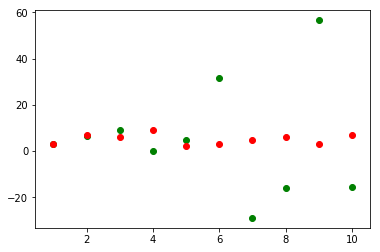

In [259]:
x_tmp1 = np.arange(1,11)
plt.scatter(x_tmp1,parameters[0],c='g') #估计值
plt.scatter(x_tmp1,w,c='r') #实际值

### 岭回归

为了解决上述两种情况中出现的问题，岭回归（Ridge Regression）应运而生。岭回归可以被看作为一种改良后的最小二乘估计法，它通过向损失函数中添加 $L_{2}$ 正则项（2-范数）有效防止模型出现过拟合，且以助于解决非满秩条件下求逆困难的问题，从而提升模型的解释能力。 对应的损失函数变为：

$$F_{Ridge}=\sum_{i=1}^{n}(y_{i}-w^Tx)^2 + \lambda \sum_{i=1}^{n}(w_{i})^2  \tag3$$

我们可以把 $(3)$ 式改写为向量表示：

$$F_{Ridge}={\left \| y-Xw \right \|_{2}}^{2} + \lambda{\left \| w \right \|_{2}}^{2} \tag4$$

公式 $(4)$ 中回归系数 $w$ 的解析解为：

$$\hat w_{Ridge} = (X^TX + \lambda I)^{-1} X^TY \tag{5}$$

####  岭回归拟合

```python
sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
```
- `alpha`: 正则化强度，默认为 1.0，对应公式 3 中的 $\lambda$。
- `fit_intercept`: 默认为 True，计算截距项。
- `normalize`: 默认为 False，不针对数据进行标准化处理。
- `copy_X`: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- `max_iter`: 最大迭代次数，默认为 None。
- `tol`: 数据解算精度。
- `solver`: 根据数据类型自动选择求解器。
- `random_state`: 随机数发生器。

Text(0.5,1,'Ridge Regression')

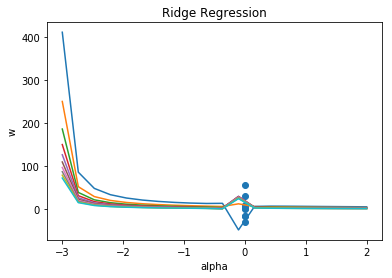

In [266]:
"""使用岭回归拟合
"""
from sklearn.linear_model import Ridge

ridge_model = Ridge(fit_intercept=False) # 参数代表不增加截距项
ridge_model.fit(x, y)
"""不同 alpha 参数拟合
"""
alphas = np.linspace(-3,2,20)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

"""绘制不同 alpha 参数结果
"""
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(alphas, coefs) # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(0,0,10), parameters[0]) # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel('alpha')
plt.ylabel('w')
plt.title('Ridge Regression')

### LASSO 回归

$$F_{LASSO}={\left \| y-Xw \right \|_{2}}^{2} + \lambda{\left \| w \right \|_{1}} \tag{6}$$

```python
sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```
- `alpha`: 正则化强度，默认为 1.0。
- `fit_intercept`: 默认为 True，计算截距项。
- `normalize`: 默认为 False，不针对数据进行标准化处理。
- `precompute`: 是否使用预先计算的 Gram 矩阵来加速计算。
- `copy_X`: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- `max_iter`: 最大迭代次数，默认为 1000。
- `tol`: 数据解算精度。
- `warm_start`: 重用先前调用的解决方案以适合初始化。
- `positive`: 强制系数为正值。
- `random_state`: 随机数发生器。
- `selection`: 每次迭代都会更新一个随机系数。

Text(0.5,1,'Lasso Regression')

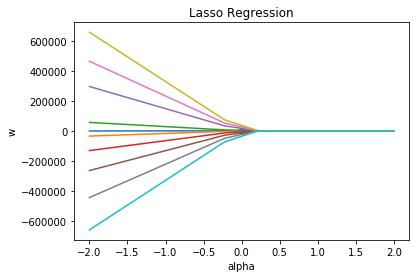

In [267]:
"""使用 LASSO 回归拟合并绘图
"""
from sklearn.linear_model import Lasso

alphas = np.linspace(-2,2,10)
lasso_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)
    
plt.plot(alphas, lasso_coefs) # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(0,0,10), parameters[0]) # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel('alpha')
plt.ylabel('w')
plt.title('Lasso Regression')

##  小结

![img](https://ws3.sinaimg.cn/large/006tNbRwly1fwi8na8lauj30qd0ihdjq.jpg)

**重点**

- [机器学习中使用正则化来防止过拟合是什么原理？通常如何判断过拟合和欠拟合](https://www.zhihu.com/question/20700829)
- [最小二乘法的本质是什么？](https://www.zhihu.com/question/37031188/answer/111336809)
- [机器学习中常常提到的正则化到底是什么意思？正则、岭回归和LASSO的理解](https://www.zhihu.com/question/20924039)